## Importing Essential Libraries

In [2]:
import numpy as np
import pandas as pd #For converting csv to DataFrame

#For Plotting Purpose
import matplotlib.pyplot as plt
import seaborn as sns

#For Transforming data and Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


#Machine Learning Models (Regression)
from sklearn.svm import SVR #Support Vector Regressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor


#Hyperparameter tuning of Models
from sklearn.model_selection import GridSearchCV

#For calculating time required for Training and Testing of Models
import time

#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

data = pd.read_csv('data\data.txt',sep = ' ',comment = '\t',skipinitialspace = True,
                  names = cols)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


# Data Cleaning

<Axes: >

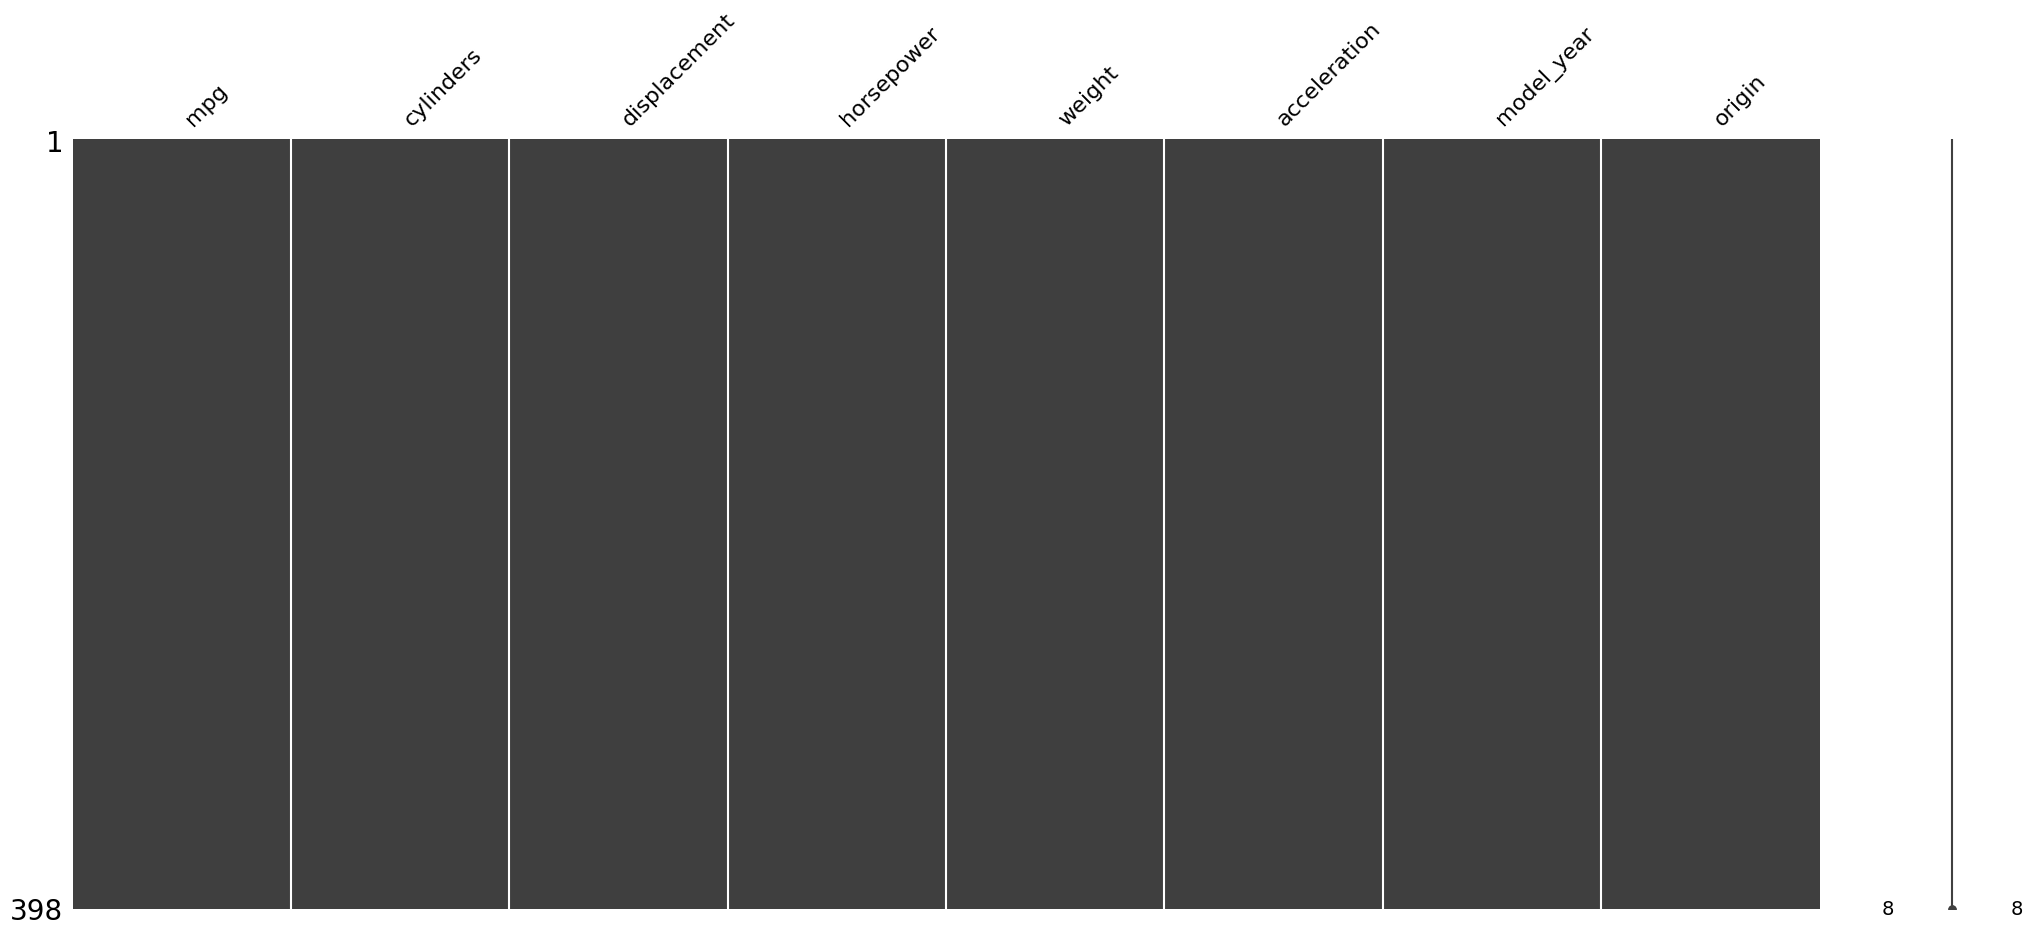

In [4]:
import missingno as msno
msno.matrix(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [6]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
#Checking if non numeric values in numeric type columns
def check_non_integer_values(col_name):
    non_integer_values = data.loc[~data[col_name].astype(str).str.match(r'[0-9]'), col_name]
    if len(non_integer_values) > 0:
        print(f"Non-Numeric values found in {col_name} column:")
        print(non_integer_values)
        print(non_integer_values.iloc[0])
    else:
        print(f"No Non-Numeric values found in {col_name} column.")


        

In [8]:
for col_name in cols:
    check_non_integer_values(col_name)

No Non-Numeric values found in mpg column.
No Non-Numeric values found in cylinders column.
No Non-Numeric values found in displacement column.
Non-Numeric values found in horsepower column:
32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object
?
No Non-Numeric values found in weight column.
No Non-Numeric values found in acceleration column.
No Non-Numeric values found in model_year column.
No Non-Numeric values found in origin column.


In [9]:
#Imputing the '?' values in horsepower column with the median of remaining values
horsepower_numeric_values = data.loc[data['horsepower'].astype(str).str.match(r'[0-9]'), 'horsepower']
horsepower_median = horsepower_numeric_values.median()

data['horsepower'] = data['horsepower'].replace('?',f'{horsepower_median}')

for col_name in cols:
    check_non_integer_values(col_name)
    
    
#Converting string variables of horsepower column to float
data['horsepower'] = data['horsepower'].astype(float)

No Non-Numeric values found in mpg column.
No Non-Numeric values found in cylinders column.
No Non-Numeric values found in displacement column.
No Non-Numeric values found in horsepower column.
No Non-Numeric values found in weight column.
No Non-Numeric values found in acceleration column.
No Non-Numeric values found in model_year column.
No Non-Numeric values found in origin column.


In [10]:
type(data['horsepower'][0])

numpy.float64

# Exploratory Data Analysis

<Axes: >

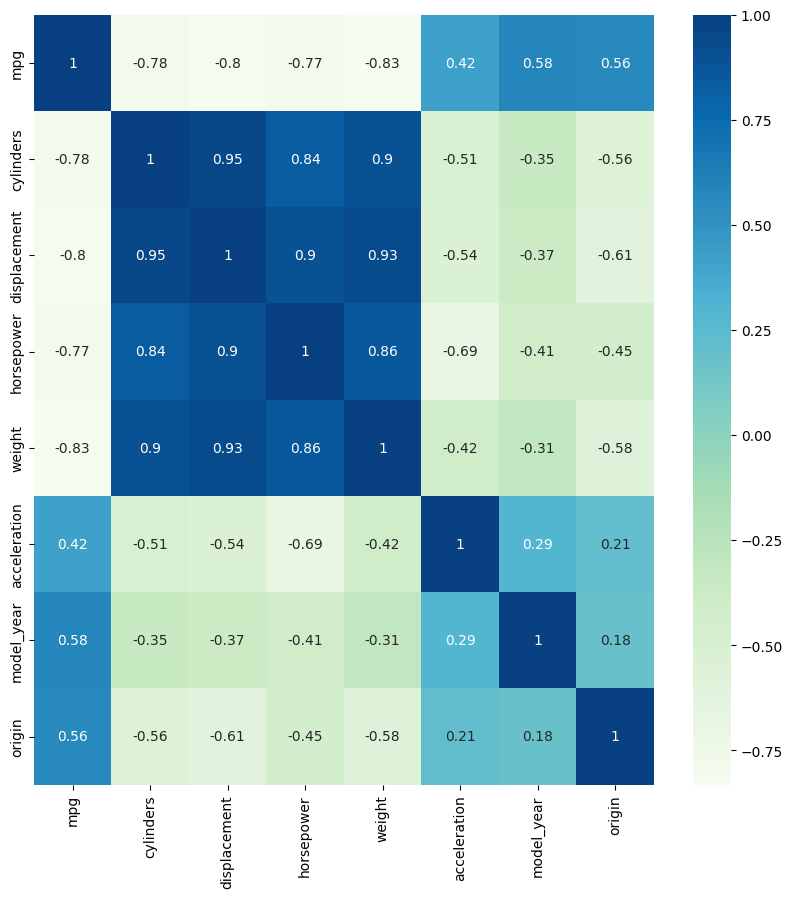

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True,cmap = 'GnBu')

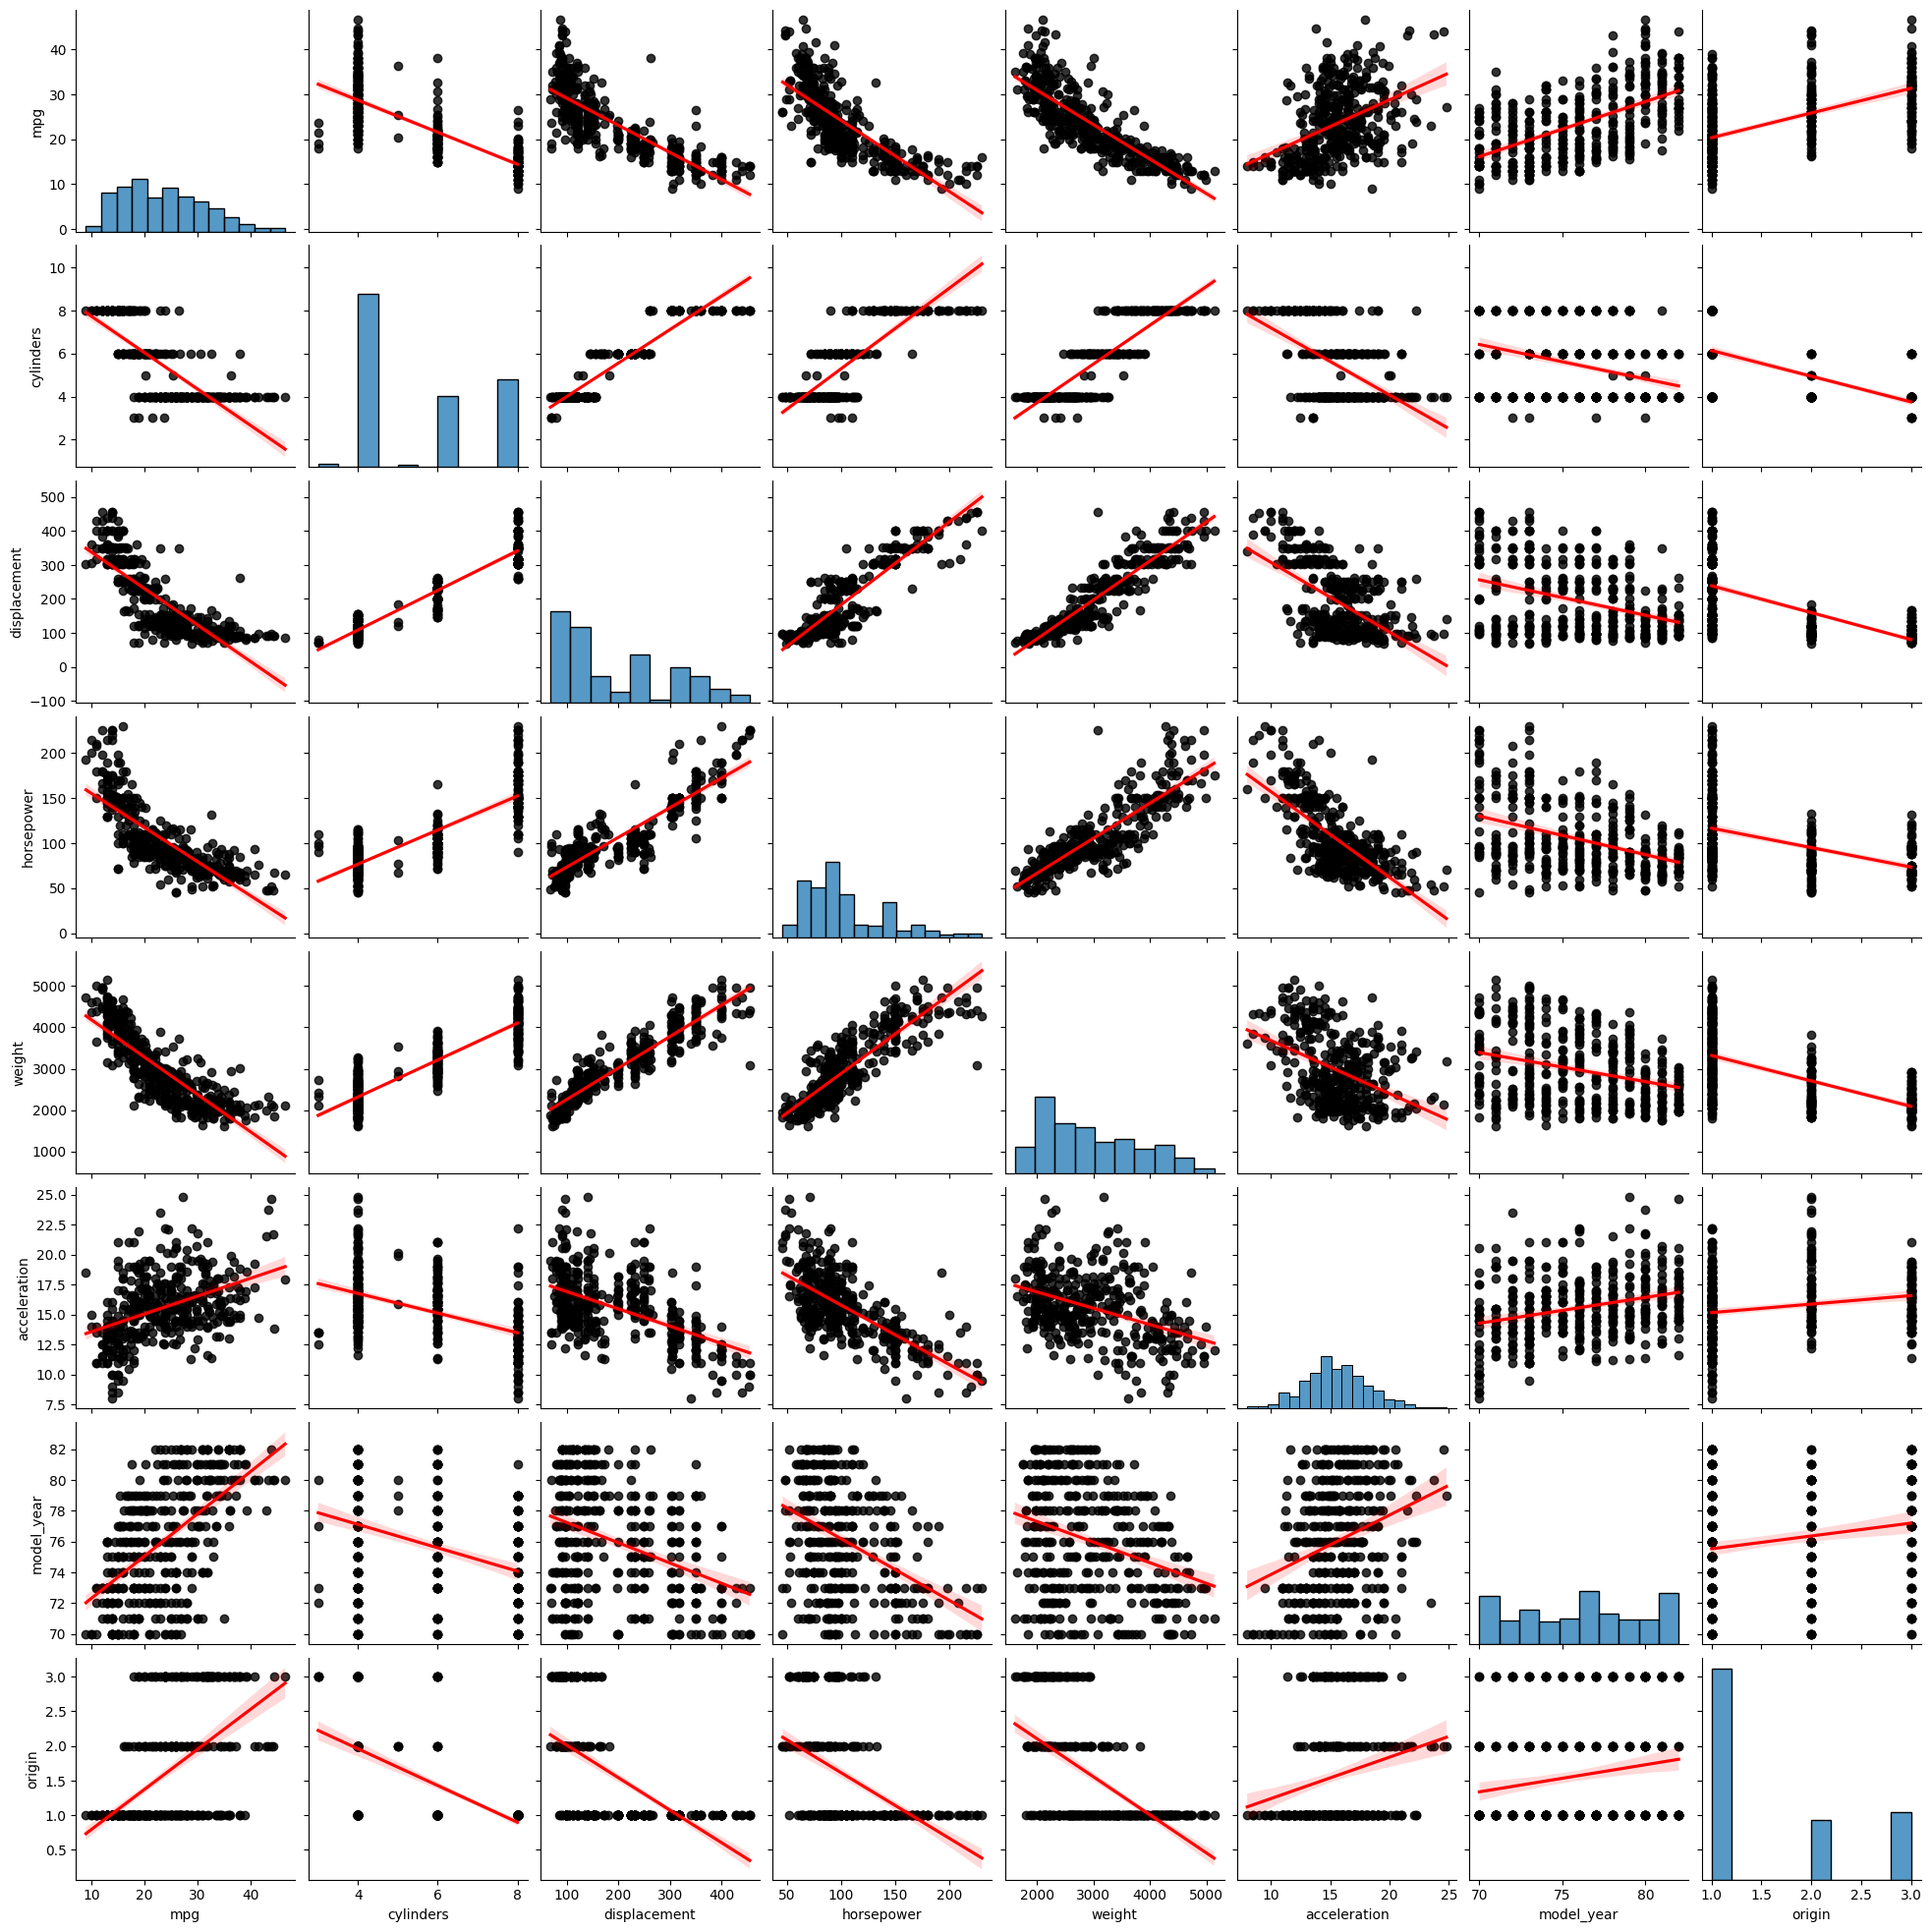

In [12]:
sns.pairplot(data, kind="reg", 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"color": "black"}})

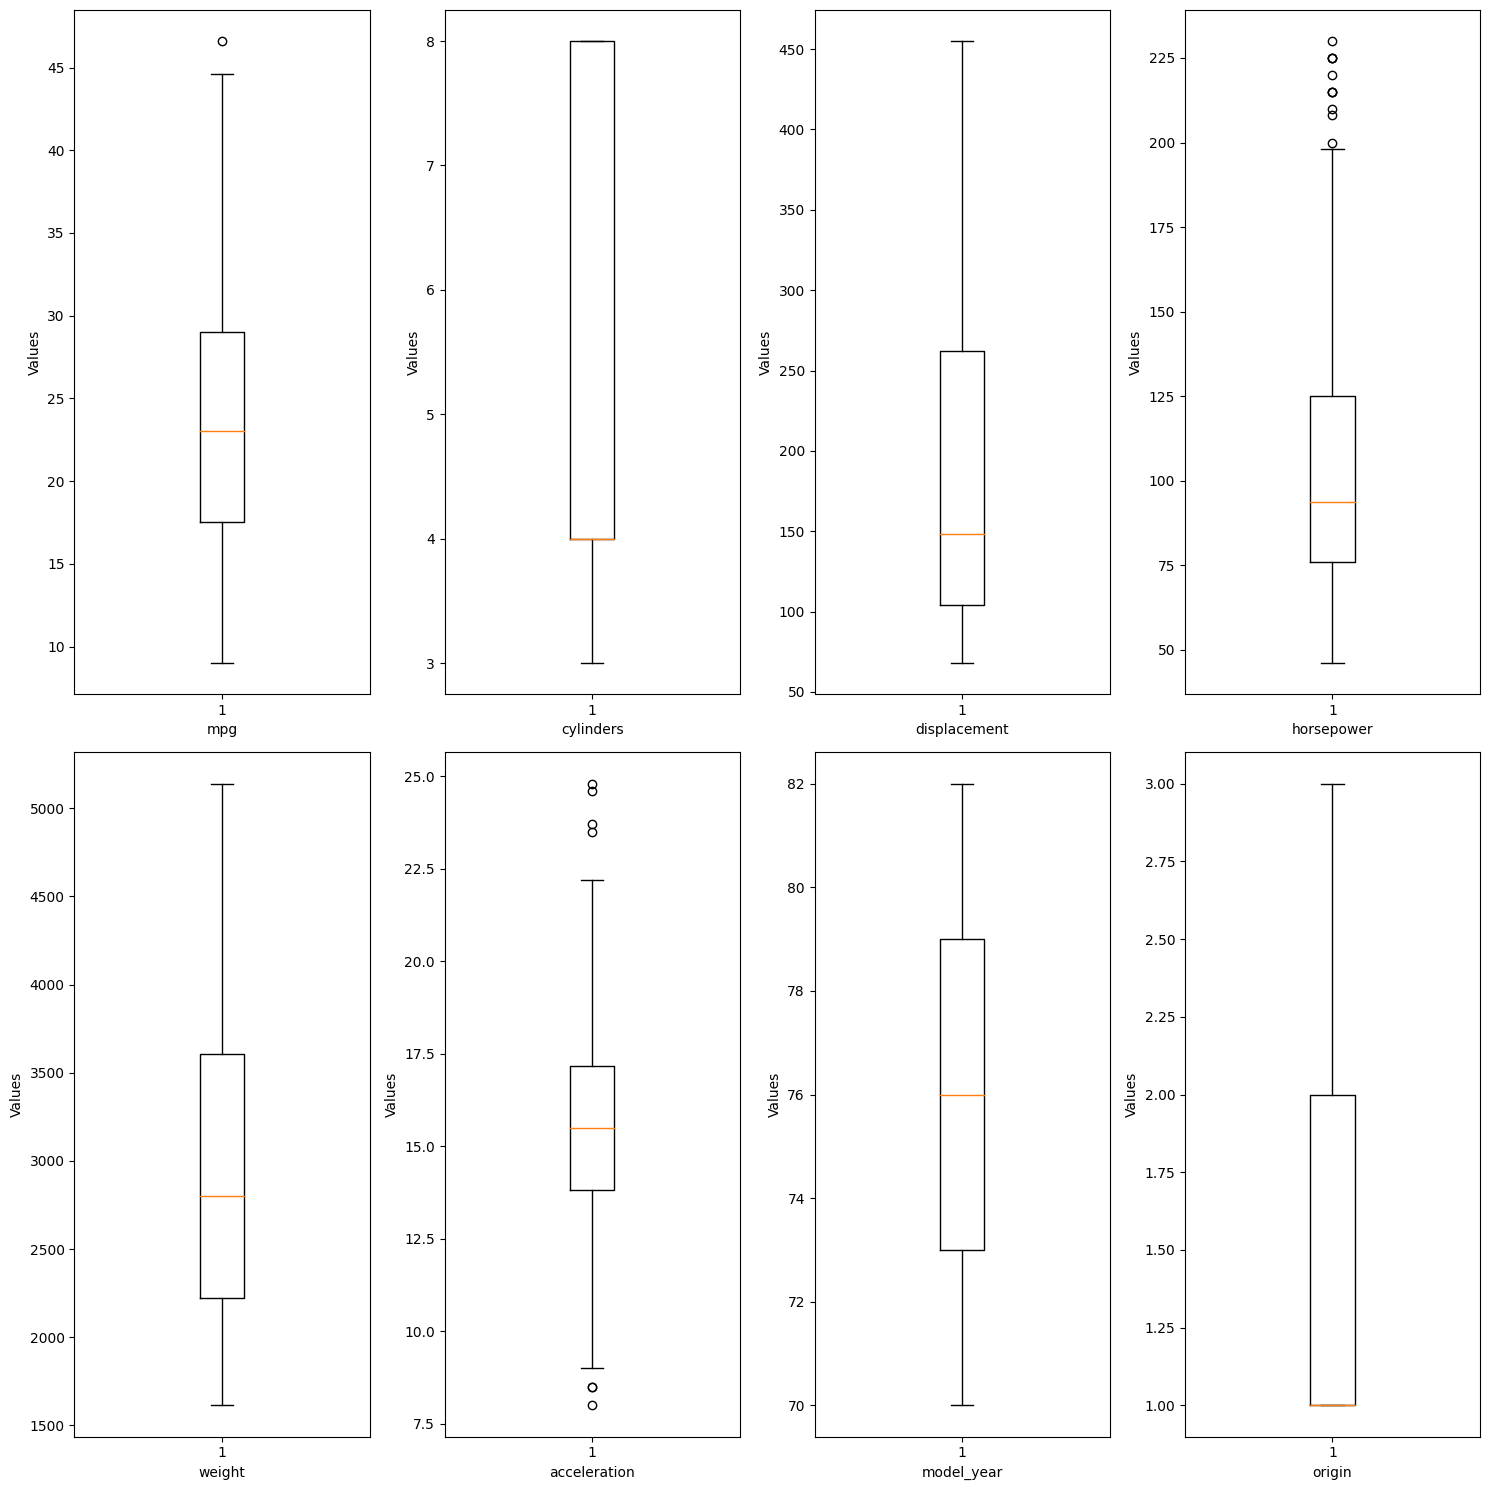

In [13]:
col1 = ['mpg','cylinders','displacement','horsepower']
num_columns = len(col1)

# Create a figure and subplots
fig, axes = plt.subplots(2, num_columns, figsize=(15, 15))

# Iterate over each column
for i, column in enumerate(col1):
    # Create a box plot for the column
    axes[0, i].boxplot(data[column])
    axes[0, i].set_xlabel(column)
    axes[0, i].set_ylabel('Values')
    
    
    
col2 = ['weight','acceleration','model_year','origin']
num_columns = len(col2)

# Iterate over each column
for i, column in enumerate(col2):
    # Create a box plot for the column
    axes[1, i].boxplot(data[column])
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Values')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Data Pre-Processing

In [14]:
power_to_weight = data['horsepower']/data['weight']
data['power_to_weight'] = power_to_weight

acceleration_efficiency = data['acceleration']/data['horsepower']
data['acceleration_efficiency'] = acceleration_efficiency

displacement_per_cylinder = data['displacement']/data['cylinders']
data['displacement_per_cylinder'] = displacement_per_cylinder

weight_per_cylinder = data['weight']/data['cylinders']
data['weight_per_cylinder'] = weight_per_cylinder

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight,acceleration_efficiency,displacement_per_cylinder,weight_per_cylinder
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0.037100,0.092308,38.375,438.000
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0.044679,0.069697,43.750,461.625
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0.043655,0.073333,39.750,429.500
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0.043694,0.080000,38.000,429.125
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0.040591,0.075000,37.750,431.125
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0.030824,0.181395,35.000,697.500
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0.024413,0.473077,24.250,532.500
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0.036601,0.138095,33.750,573.750
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0.030095,0.235443,30.000,656.250


In [15]:
# Shuffling the dataset
data = shuffle(data, random_state = 42)

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight,acceleration_efficiency,displacement_per_cylinder,weight_per_cylinder
198,33.0,4,91.0,53.0,1795.0,17.4,76,3,0.029526,0.328302,22.750000,448.750000
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0.030095,0.235443,30.000000,656.250000
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,0.037965,0.130000,38.666667,439.000000
208,13.0,8,318.0,150.0,3940.0,13.2,76,1,0.038071,0.088000,39.750000,492.500000
93,14.0,8,318.0,150.0,4237.0,14.5,73,1,0.035402,0.096667,39.750000,529.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
71,19.0,3,70.0,97.0,2330.0,13.5,72,3,0.041631,0.139175,23.333333,776.666667
106,12.0,8,350.0,180.0,4499.0,12.5,73,1,0.040009,0.069444,43.750000,562.375000
270,21.1,4,134.0,95.0,2515.0,14.8,78,3,0.037773,0.155789,33.500000,628.750000
348,37.7,4,89.0,62.0,2050.0,17.3,81,3,0.030244,0.279032,22.250000,512.500000


In [16]:
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the 'origin' column
origin_encoded = encoder.fit_transform(data[['origin']])

# Create column names for the encoded columns
column_names = encoder.get_feature_names_out(['origin'])

# Create a DataFrame from the one-hot encoded data
origin_encoded_df = pd.DataFrame(origin_encoded, columns=column_names)

# Concatenate the original DataFrame with the one-hot encoded columns
data = pd.concat([data, origin_encoded_df], axis=1)

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight,acceleration_efficiency,displacement_per_cylinder,weight_per_cylinder,origin_1,origin_2,origin_3
198,33.0,4,91.0,53.0,1795.0,17.4,76,3,0.029526,0.328302,22.750000,448.750000,0.0,1.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0.030095,0.235443,30.000000,656.250000,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,0.037965,0.130000,38.666667,439.000000,0.0,0.0,1.0
208,13.0,8,318.0,150.0,3940.0,13.2,76,1,0.038071,0.088000,39.750000,492.500000,0.0,0.0,1.0
93,14.0,8,318.0,150.0,4237.0,14.5,73,1,0.035402,0.096667,39.750000,529.625000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,19.0,3,70.0,97.0,2330.0,13.5,72,3,0.041631,0.139175,23.333333,776.666667,1.0,0.0,0.0
106,12.0,8,350.0,180.0,4499.0,12.5,73,1,0.040009,0.069444,43.750000,562.375000,0.0,1.0,0.0
270,21.1,4,134.0,95.0,2515.0,14.8,78,3,0.037773,0.155789,33.500000,628.750000,0.0,1.0,0.0
348,37.7,4,89.0,62.0,2050.0,17.3,81,3,0.030244,0.279032,22.250000,512.500000,1.0,0.0,0.0


In [17]:
df = data.copy()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight,acceleration_efficiency,displacement_per_cylinder,weight_per_cylinder,origin_1,origin_2,origin_3
198,33.0,4,91.0,53.0,1795.0,17.4,76,3,0.029526,0.328302,22.750000,448.750000,0.0,1.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0.030095,0.235443,30.000000,656.250000,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,0.037965,0.130000,38.666667,439.000000,0.0,0.0,1.0
208,13.0,8,318.0,150.0,3940.0,13.2,76,1,0.038071,0.088000,39.750000,492.500000,0.0,0.0,1.0
93,14.0,8,318.0,150.0,4237.0,14.5,73,1,0.035402,0.096667,39.750000,529.625000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,19.0,3,70.0,97.0,2330.0,13.5,72,3,0.041631,0.139175,23.333333,776.666667,1.0,0.0,0.0
106,12.0,8,350.0,180.0,4499.0,12.5,73,1,0.040009,0.069444,43.750000,562.375000,0.0,1.0,0.0
270,21.1,4,134.0,95.0,2515.0,14.8,78,3,0.037773,0.155789,33.500000,628.750000,0.0,1.0,0.0
348,37.7,4,89.0,62.0,2050.0,17.3,81,3,0.030244,0.279032,22.250000,512.500000,1.0,0.0,0.0


In [18]:
y = data['mpg']
X = data.drop('mpg', axis = 1)

In [19]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [20]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight,acceleration_efficiency,displacement_per_cylinder,weight_per_cylinder,origin_1,origin_2,origin_3
198,4,91.0,53.0,1795.0,17.4,76,3,0.029526,0.328302,22.750000,448.750000,0.0,1.0,0.0
396,4,120.0,79.0,2625.0,18.6,82,1,0.030095,0.235443,30.000000,656.250000,0.0,0.0,1.0
33,6,232.0,100.0,2634.0,13.0,71,1,0.037965,0.130000,38.666667,439.000000,0.0,0.0,1.0
208,8,318.0,150.0,3940.0,13.2,76,1,0.038071,0.088000,39.750000,492.500000,0.0,0.0,1.0
93,8,318.0,150.0,4237.0,14.5,73,1,0.035402,0.096667,39.750000,529.625000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3,70.0,97.0,2330.0,13.5,72,3,0.041631,0.139175,23.333333,776.666667,1.0,0.0,0.0
106,8,350.0,180.0,4499.0,12.5,73,1,0.040009,0.069444,43.750000,562.375000,0.0,1.0,0.0
270,4,134.0,95.0,2515.0,14.8,78,3,0.037773,0.155789,33.500000,628.750000,0.0,1.0,0.0
348,4,89.0,62.0,2050.0,17.3,81,3,0.030244,0.279032,22.250000,512.500000,1.0,0.0,0.0


In [21]:
std_scaler = StandardScaler()

X = std_scaler.fit_transform(X)
X

array([[-0.85632057, -0.98355191, -1.34393162, ..., -1.29272617,
         2.16465108, -0.49764335],
       [-0.85632057, -0.70507731, -0.66285006, ..., -1.29272617,
        -0.46196822,  2.00947124],
       [ 0.32093534,  0.37041078, -0.11274572, ..., -1.29272617,
        -0.46196822,  2.00947124],
       ...,
       [-0.85632057, -0.5706413 , -0.24372294, ..., -1.29272617,
         2.16465108, -0.49764335],
       [-0.85632057, -1.00275705, -1.10817262, ...,  0.77355903,
        -0.46196822, -0.49764335],
       [-0.85632057, -0.92593647, -1.52729973, ...,  0.77355903,
        -0.46196822, -0.49764335]])

# Modelling (Initial Stage)

In [22]:
# Step 1: Data Preprocessing
# Assume you have X as the features and y as the target variable

# Step 2: Model Selection
model = LinearRegression()

# Step 3: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Training the Model
model.fit(X_train, y_train)

# Step 5: Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_root_mean_squared_error')  # Perform 5-fold cross-validation

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

# Print the cross-validation scores and test accuracy
print("Cross-Validation Scores:", -cv_scores)

Cross-Validation Scores: [3.16439443 3.45051894 2.76761306 3.25632522 2.38546648 2.74452652
 3.36276979 2.23288562 3.32251482 4.03738998]


In [23]:
def model_output(model):
    print(f'For Model: {type(model).__name__}')
    # Step 4: Training the Model
    model.fit(X_train, y_train)

    # Step 5: Cross-Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'neg_root_mean_squared_error')  # Perform 5-fold cross-validation

    # Step 6: Evaluate the Model
    y_pred = model.predict(X_test)

    # Print the cross-validation scores and test accuracy
    print("Cross-Validation Scores:", -cv_scores)
    
    print(f"RMSE : {mean_squared_error(y_test, y_pred, squared = False)}")
    

In [24]:
#Models
randomForest = RandomForestRegressor()
linearReg = LinearRegression()
svr = SVR()
XGBReg = XGBRegressor()
LGBMReg = LGBMRegressor()

models = [randomForest, linearReg, svr, XGBReg, LGBMReg]

for model in models:
    model_output(model)

For Model: RandomForestRegressor


Cross-Validation Scores: [2.94400248 3.29590116 2.35688333 2.89401455 3.07821603]
RMSE : 2.6420856179351917
For Model: LinearRegression
Cross-Validation Scores: [3.26679346 2.96583689 2.60739269 2.86803621 3.56971716]
RMSE : 2.9799567885210085
For Model: SVR
Cross-Validation Scores: [3.24591768 2.9792143  3.20476059 4.3820719  3.10582203]
RMSE : 4.258971346567672
For Model: XGBRegressor
Cross-Validation Scores: [2.96240554 3.38082117 2.36161025 3.44469602 2.79702658]
RMSE : 2.86564037186423
For Model: LGBMRegressor
Cross-Validation Scores: [3.2101871  3.24046716 2.44923208 3.09193307 3.05330566]
RMSE : 2.569862870696648


In [25]:
def find_best_model(model, param_grid):
    CV_md = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring = 'neg_mean_squared_error')


    start = time.time()
    CV_md.fit(X_train, y_train)
    end = time.time()


    print('Total Time Required : \n', end-start)

    best = CV_md.best_estimator_ #Best Estimator
    print('Best Estimator is : \n')
    print(best)
    clf = best
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"RMSE : {mean_squared_error(y_test, y_pred, squared = False)}")
    
    
    

In [26]:
#Finding best Random Forest
param_grid = { 
        'n_estimators': [100,200,500,1000],
        'max_features': ['sqrt','log2'],
        'max_depth' : [4,6,8,10],
        'criterion' :['squared_error']
    }

md = RandomForestRegressor(random_state = 42)
find_best_model(model = md, param_grid = param_grid)

Total Time Required : 
 123.14219260215759
Best Estimator is : 

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=200,
                      random_state=42)
RMSE : 2.9543699785062336


In [27]:
#Finding the best XGBoost Model
param_grid={"learning_rate": (0.05, 0.10, 0.15),
                "max_depth": [ 3, 4, 5, 6, 8],
                "min_child_weight": [ 1, 3, 5, 7],
                "gamma":[ 0.0, 0.1, 0.2],
                "colsample_bytree":[ 0.3, 0.4],
           }
md = XGBRegressor(random_state = 42)
find_best_model(model = md, param_grid = param_grid)

Total Time Required : 
 118.74557185173035
Best Estimator is : 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)
RMSE : 2.7127257939547533


In [28]:
#Finding the best Support Vector Regressor
param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
                "gamma":['scale', 'auto'],
                'coef0' : [0.01, 0.1, 10],
                "C":[0.001, 0.01, 0.1, 1, 10]
           }
md = SVR()
find_best_model(model = md, param_grid = param_grid)

Total Time Required : 
 11.773560762405396
Best Estimator is : 

SVR(C=0.1, coef0=10, gamma='auto', kernel='poly')
RMSE : 2.9904326644733947


In [29]:
param_grid = {
    'reg_alpha': [0.1, 1, 10],
    'reg_lambda': [0.1, 1, 10],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200]
    }
md = LGBMRegressor(random_state = 42)
find_best_model(model = md, param_grid = param_grid)

Total Time Required : 
 56.454142332077026
Best Estimator is : 

LGBMRegressor(max_depth=6, n_estimators=50, random_state=42, reg_alpha=0.1,
              reg_lambda=1)
RMSE : 2.660534759051661


In [30]:
param_grid = { 'copy_X': [True],
        'fit_intercept': [True, False],
        'positive': [True, False]
        }

md = LinearRegression()
find_best_model(model = md, param_grid = param_grid)

Total Time Required : 
 0.06561803817749023
Best Estimator is : 

LinearRegression()
RMSE : 2.9799567885210085


# Modelling (Final Stage)

In [31]:
estimators = [ 
    ('RandomForest',RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=200,
                                          random_state=42)),
     
     ('XGBoost',XGBRegressor(colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, 
             min_child_weight=1, n_estimators=100, random_state=42)),
     
     ('SupportVector', SVR(C=0.1, coef0=10, gamma='auto', kernel='poly')),
     
     ('LGBM', LGBMRegressor(max_depth=6, n_estimators=50, random_state=42, reg_alpha=0.1,
              reg_lambda=1)),
     
     ('LinearRegression', LinearRegression())
     ]

In [32]:
#Stacking 

# Step 2: Model Selection
model = StackingRegressor(estimators=estimators)

model_output(model)

For Model: StackingRegressor


Cross-Validation Scores: [2.86814677 3.03090064 2.40917663 3.10553347 3.00799167]
RMSE : 2.715166414424036


# Final Results